In [42]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portada - Análisis de Datos</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }
        .container {
            max-width: 800px;
            width: 90%;
            background: white;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
            text-align: center;
        }
        .header img {
            max-width: 100%;
            height: auto;
            margin-bottom: 20px;
            border-radius: 5px;
        }
        h1 {
            color: #333;
        }
        h2 {
            color: #555;
            margin-top: 10px;
        }
        .group, .tutor, .members {
            margin: 20px 0;
        }
        .members ul {
            list-style-type: none;
            padding: 0;
        }
        .members li {
            margin: 5px 0;
            color: #666;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width = "780" height = "140" align = "right">
        </div>
        <h1>ANÁLISIS DE DATOS</h1>
        <div class="group">
            <h2>GRUPO: 202016908_78</h2>
        </div>
        <div class="tutor">
            <h2>TUTORA</h2>
            <ul>
            Ángela Bibiana Ortegón Fuentes
            </ul>
        </div>
        <div class="members">
            <h2>INTEGRANTES</h2>
            <ul>
                <li>Sergio Andrés Aponte Suarez</li>
                <li>Daniel Cantor Verano</li>
                <li>Richard Sneider Mendivelso Romero</li>
                <li>Javier Alejandro Segura Rodríguez</li>
            </ul>
        </div>
    </div>
</body>
</html>
"""

display(HTML(html_content))


# 1 Análisis exploratorio de datos

In [15]:
#Importar librerias

import pandas as pd #Manejo y análisis de estructura de datos
import numpy as np #Calculo numérico y el análisis de datos
import seaborn as sns #Creación gráficos estadísticos
import matplotlib.pyplot as plt #Creación de gráficos en dos dimensiones
import plotly.graph_objs as go #Creación de gráficos en tres dimensiones
import plotly.express as px #Creación de gráficos en tres dimensiones

#Librerias para implementar modelo kmeans
from sklearn.cluster import AgglomerativeClustering #Algoritmos de agrupamiento o Clustering, dividir datos en grupos o clusters basados en su similitud
from sklearn.preprocessing import StandardScaler #Escalar o normalizar los datos
from scipy.cluster.hierarchy import linkage, dendrogram #Herramientas para realizar agrupamiento jerárquico y visualización de dendogramas
#Dendogram: Genera un gráfico de árbol

#Librerias para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librerias para evitar la advertencia de que el modelo tiene una perdida de memoria en Windows

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Cargar datos
data = pd.read_csv('Mall_Customers.csv')

In [49]:
data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [51]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
#Obtener información de tipo y el total de valores de datos 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación Datos Faltantes y Atípicos')

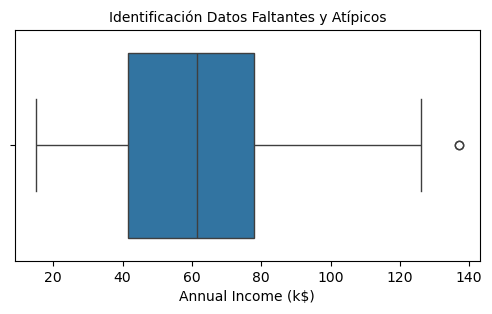

In [57]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize = (6,3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación Datos Faltantes y Atípicos', fontsize= 10)

Text(0.5, 1.0, 'Identificación Datos Faltantes y Atípicos')

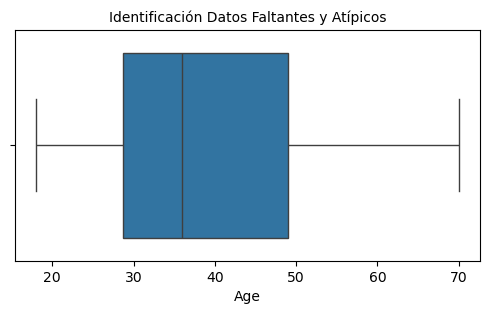

In [59]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize = (6,3))
sns.boxplot(x=data['Age'])
plt.title('Identificación Datos Faltantes y Atípicos', fontsize= 10)

Text(0.5, 1.0, 'Spending Score (1-100)')

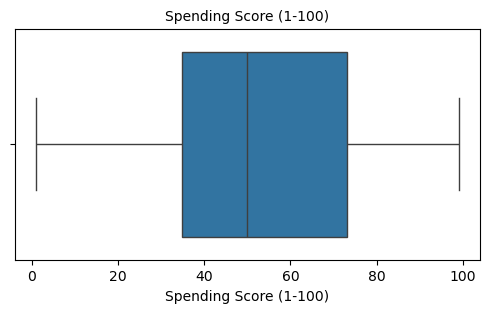

In [67]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize = (6,3))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Spending Score (1-100)', fontsize= 10)

In [69]:
#Revisar valores faltantes

print('Cantidad de registros con cero en CustomerID ',data['CustomerID'].isin([0]).sum())
print('Cantidad de registros con cero en Age',data['Age'].isin([0]).sum())
print('Cantidad de registros con cero en Annual Income',data['Annual Income (k$)'].isin([0]).sum())
print('Cantidad de registros con cero en Spending Score',data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros con cero en CustomerID  0
Cantidad de registros con cero en Age 0
Cantidad de registros con cero en Annual Income 0
Cantidad de registros con cero en Spending Score 0


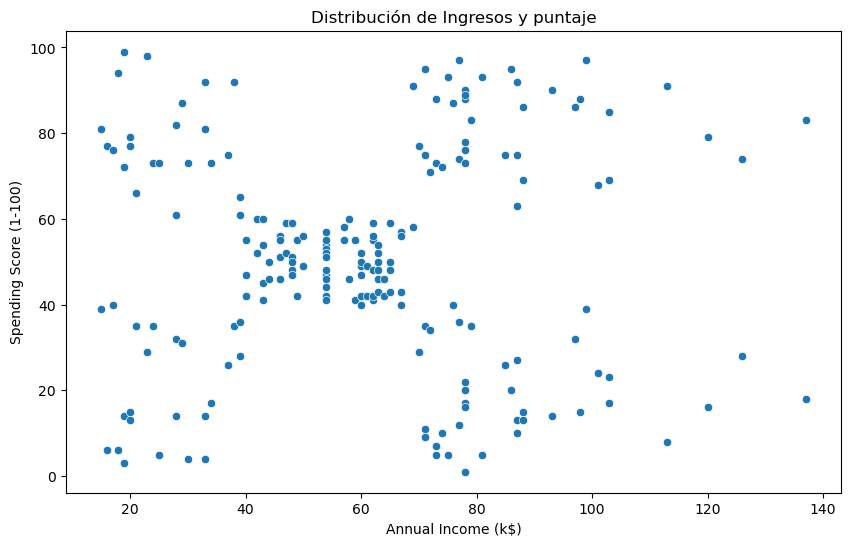

In [7]:
#Grafica antes del agrupamiento

plt.figure(figsize = (10,6))
sns.scatterplot(x=data['Annual Income (k$)'], y = data['Spending Score (1-100)'])
plt.title('Distribución de Ingresos y puntaje')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

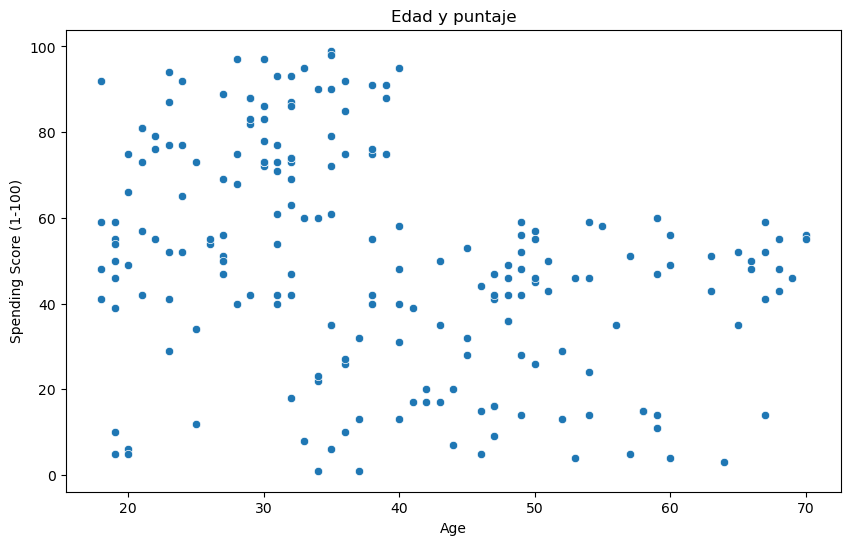

In [11]:
#Grafica antes del agrupamiento

plt.figure(figsize = (10,6))
sns.scatterplot(x=data['Age'], y = data['Spending Score (1-100)'])
plt.title('Edad y puntaje')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])

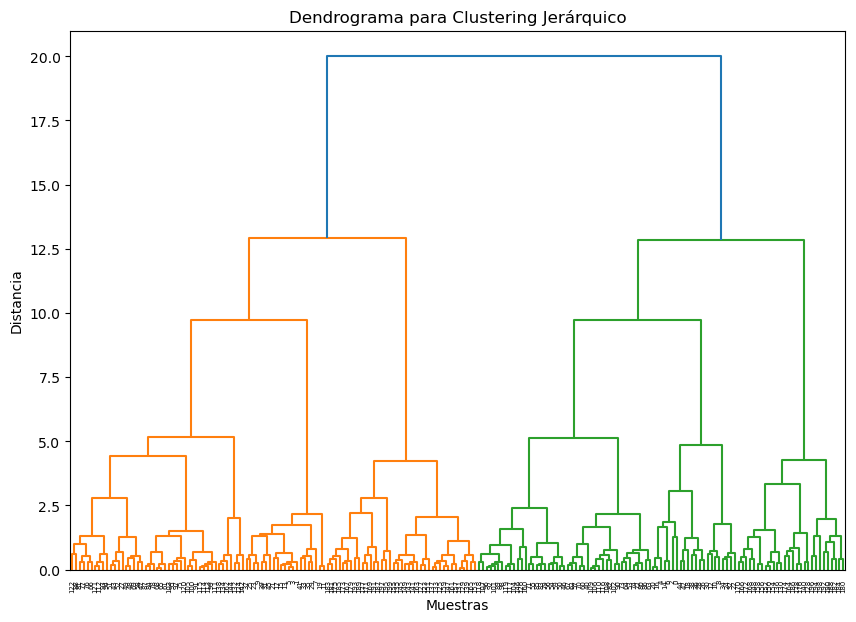

In [27]:
#check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data) #Reemplaza valores Nan

#Continue with hierarchical clustering
linked = linkage(scaled_data,method = 'ward') #Realiza el enlace jerarquico con el metodo ward

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort = 'descending',show_leaf_counts= False)#Dibuja en dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [65]:
data[['Age','Annual Income (k$)','Spending Score (1-100)']] = data[['Age','Annual Income (k$)','Spending Score (1-100)']].fillna(data[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=6, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.4201169558789579
Índice de Calinski-Harabasz: 127.98645433956887
Índice de Davies-Bouldin: 0.8521020845733146


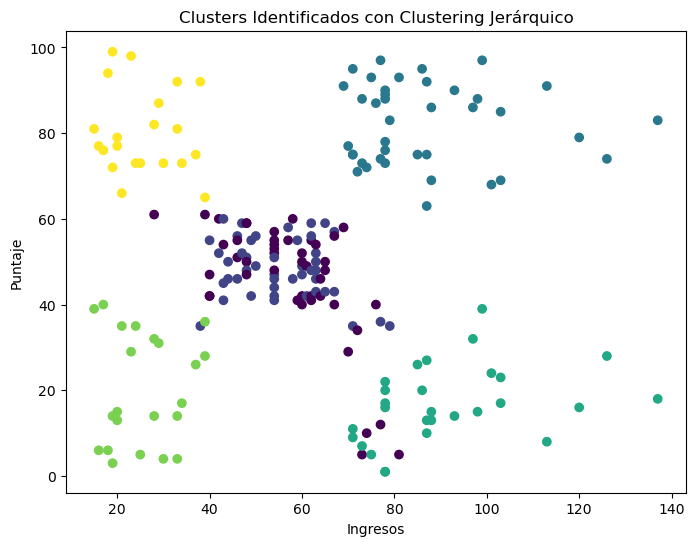

In [71]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=6)  # Ajustar el número de clusters
data['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Ingresos')
plt.ylabel('Puntaje')
plt.show()

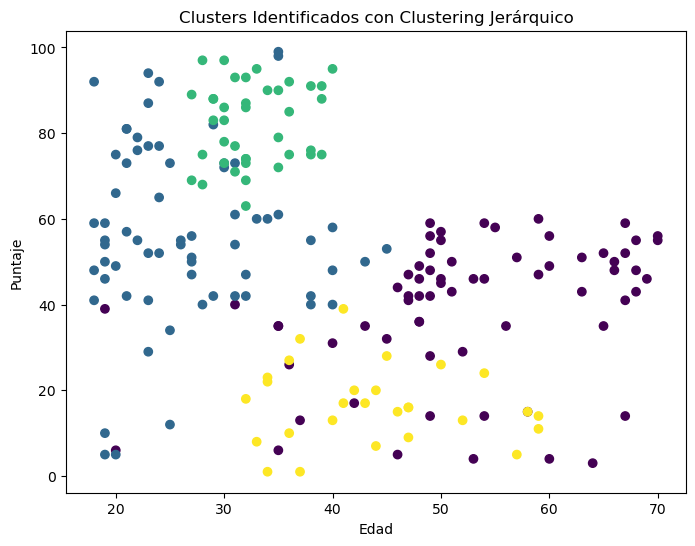

In [75]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
data['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Puntaje')
plt.show()

Silhouette Score: 0.3614512741691407


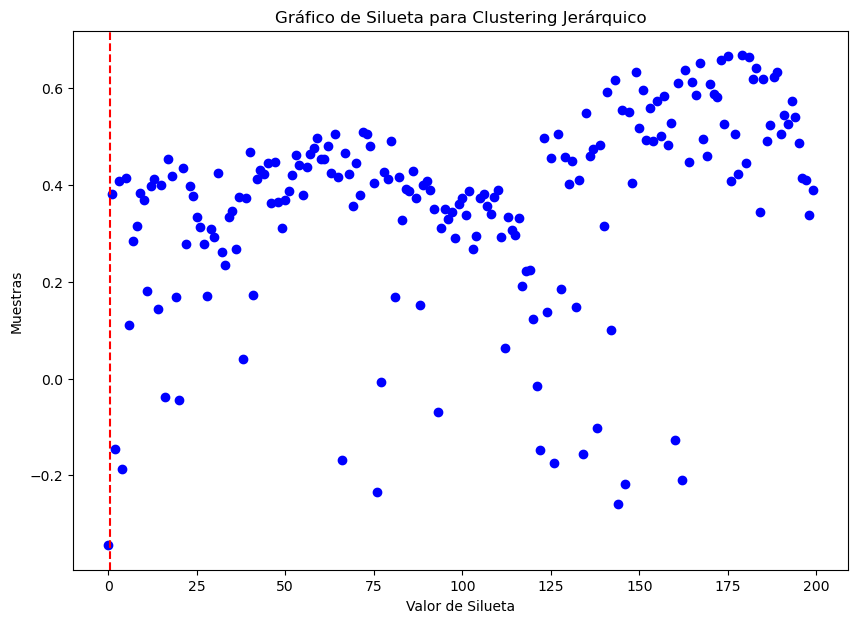

In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()